In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

%matplotlib notebook

FFT_SIZE = 65536*4*4*4

raw = np.fromfile('./data/own/IQREC-02-03-19-13h38m31s479.iq', dtype='int16')
sc = raw[0:len(raw):2] + 1.0j * raw[0:len(raw):2]

In [2]:
WIN_SIZE = 65536*4*4*4
win = scipy.signal.nuttall(WIN_SIZE)

f = np.zeros((len(win), int(len(sc) / len(win) / 2)))
for k in np.arange(0, len(sc) - len(win), len(win) / 2, dtype='int16'):
    windowed = sc[k : k + len(win)] * win
#     f[:,k] = 20 * np.log10(abs(np.fft.fftshift(np.fft.fft(windowed))))
    f[:,k] = 20 * np.log10(abs(np.fft.fft(windowed)))

<IPython.core.display.Javascript object>


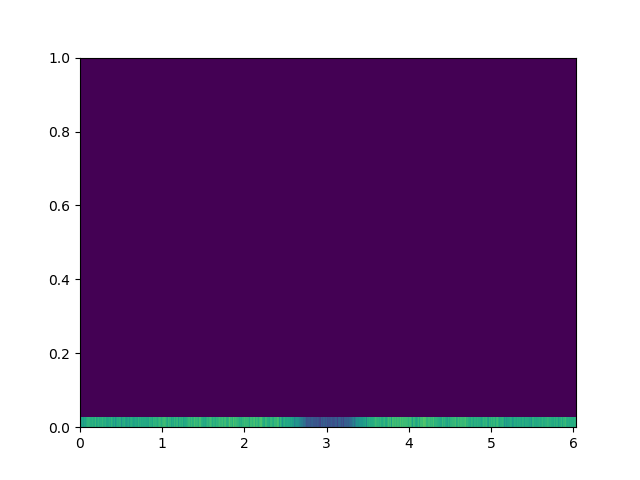

In [8]:
%matplotlib notebook

t = np.linspace(0, len(sc) / 50e6, len(f))
w = np.linspace(0, 1, f.shape[1])

plt.pcolormesh(t, w, f.T)
plt.show()

In [4]:
# fd, td, Sxxd = scipy.signal.spectrogram(sc[0:9086*8], fs=8000, window='nuttall',
#                                      noverlap=int(256), nperseg=int(512),
#                                      nfft=2048*16*8*2*2*2)

# fd, td, Sxxd = scipy.signal.spectrogram(sc[0:9086*8], fs=8000, window='nuttall',
#                                      noverlap=int(256*4), nperseg=int(512*4),
#                                      nfft=FFT_SIZE)

# fd, td, Sxxd = scipy.signal.spectrogram(sc[0:9086*8], fs=8000, window='nuttall', nfft=FFT_SIZE)


# # plt.pcolormesh(td, fd[0:int(60000 * 8/14)], Sxxd[:][0:int(60000 * 8/14)])
# plt.pcolormesh(td, fd[0:int(60000)], Sxxd[:][0:int(60000)])
# plt.show()

# T = 10
# fs = 8000 * 16

# ts = np.linspace(0, T, T*fs, endpoint=False)
# chirp = scipy.signal.chirp(ts, f0=2e6, t1=128*16, f1=20e6, method='linear')

# f, t, Sxx = scipy.signal.spectrogram(chirp, fs=fs, window='nuttall',
#                                      noverlap=256*8*2, nperseg=512*8*2,
#                                      nfft=2048*16*8)

In [5]:
# delayed = scipy.signal.chirp(ts, f0=2e6, t1=128*16,
#                              f1=20e6, method='linear')
# delayed = np.array([0] * 600 + list(delayed[600:]))

# fd, td, Sxxd = scipy.signal.spectrogram(delayed, fs=fs, window='nuttall',
#                                      noverlap=256*8*2, nperseg=512*8*2,
#                                      nfft=2048*16*8)

# fig = plt.figure()
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
# ax1.pcolormesh(t, f, Sxx)
# ax2.pcolormesh(td, fd, Sxxd)


In [6]:
# cor = scipy.signal.correlate(chirp, delayed)
# plt.plot(np.linspace(0, 10, len(cor)), cor)

In [7]:
# rep_f = np.random.normal(0, 1, (len(chirp), 2048))
# rep_t = np.fft.ifft(rep_f, 1)

# rx = chirp + rep_t[0]

# fr, tr, Sxxr = scipy.signal.spectrogram(rx, fs=fs, window='nuttall',
#                                      noverlap=256*8*2, nperseg=512*8*2,
#                                      nfft=2048*16*8)
# plt.pcolormesh(tr, fr, Sxxr)
# plt.show()

# cor = scipy.signal.correlate(rx, delayed)
# plt.plot(np.linspace(0, 10, len(cor)), cor)
# plt.show()